In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import h5py

import sys
sys.path.append('../../../../src')
from utils import smooth_curve
from viz import show_images
from PlumeDataset import plume_dataset
from AutoAlign import align_plumes
from Velocity import VelocityCalculator
from PlumeMetrics import PlumeMetrics
from HorizontalLineProfileAnalyzer import HorizontalLineProfileAnalyzer
from AutoAlign import visualize_corners
from analyze_function import analyze_function

In [2]:
file = 'D:/pld_plumes/SRO_STO_Drexel/YG056_YichenGuo_06282024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
print(keys)

ds_name = file.split('/')[-1].split('_')[0]
plumes = plume_ds.load_plumes('1-SrRuO3')

['1-SrRuO3', '1-SrRuO3_Pre']


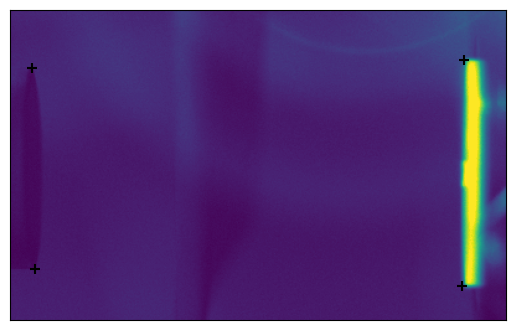

In [3]:
frame_view_YG056 = plume_ds.load_plumes('1-SrRuO3_Pre')[1][1]
coords_YG056 = np.array([[17,46], [20,208], [366,40], [364,222]])
# px.imshow(frame_view_YG056)
visualize_corners(frame_view_YG056, coords_YG056, color='k', marker_size=50)
np.save(f'../../../../datasets/frame_normalization_coords/{ds_name}_coords.npy', coords_YG056)

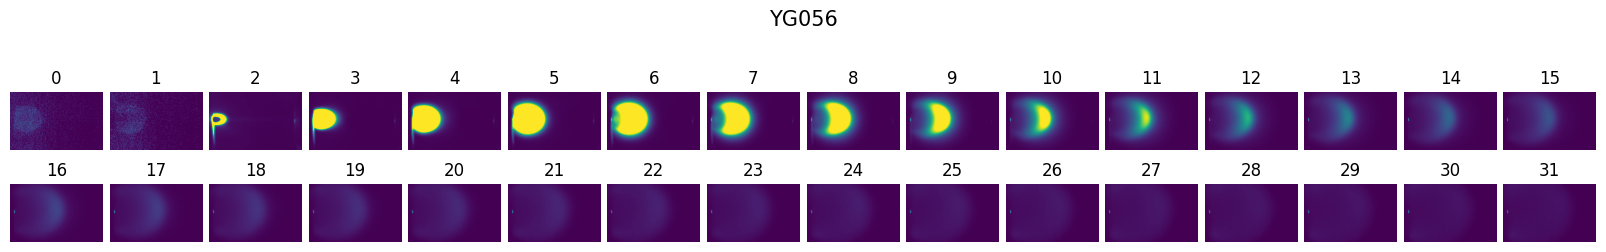

100%|██████████| 219/219 [01:07<00:00,  3.22it/s]


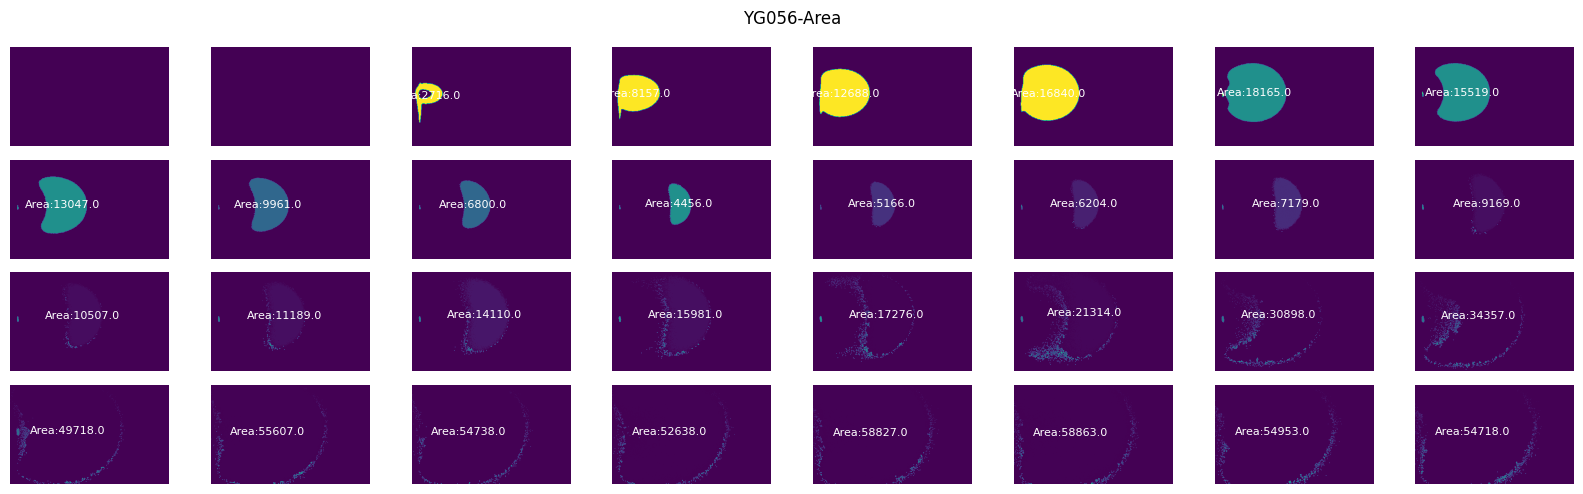

100%|██████████| 219/219 [00:20<00:00, 10.69it/s]


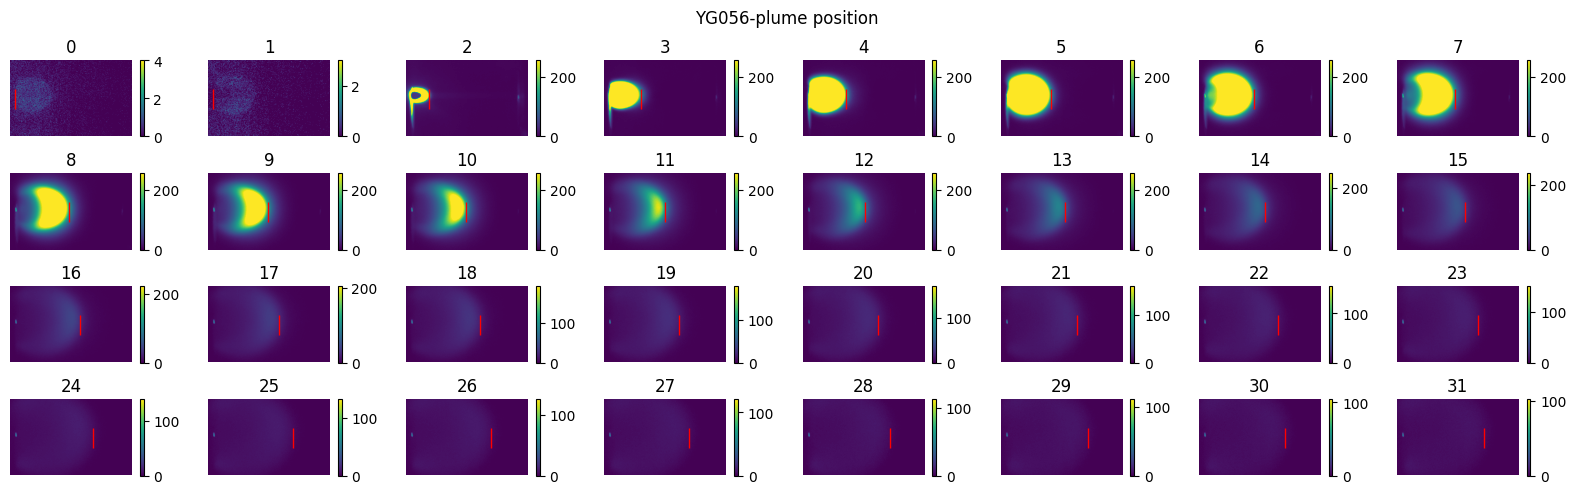

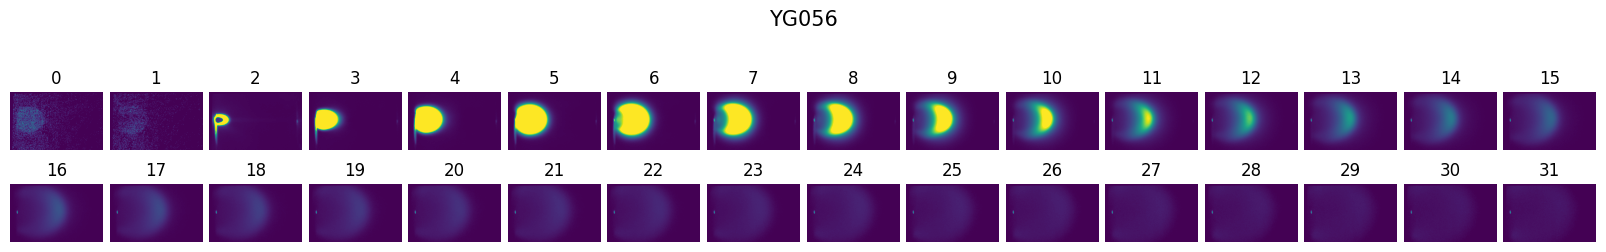

100%|██████████| 219/219 [00:40<00:00,  5.42it/s]


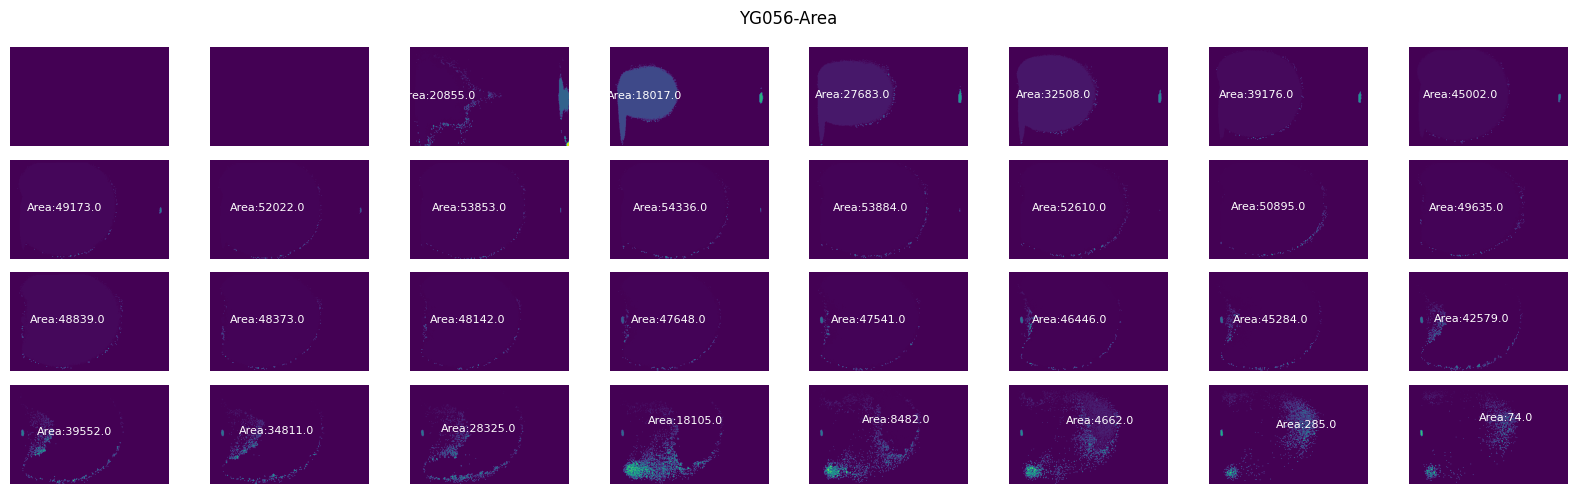

100%|██████████| 219/219 [01:40<00:00,  2.18it/s]


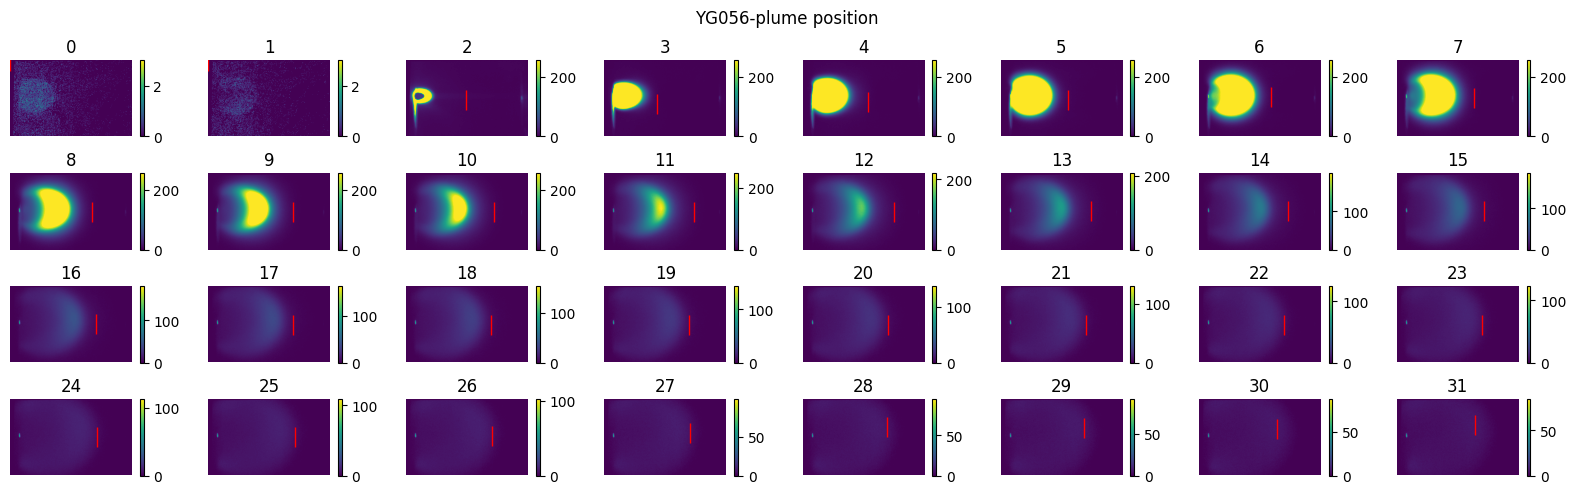

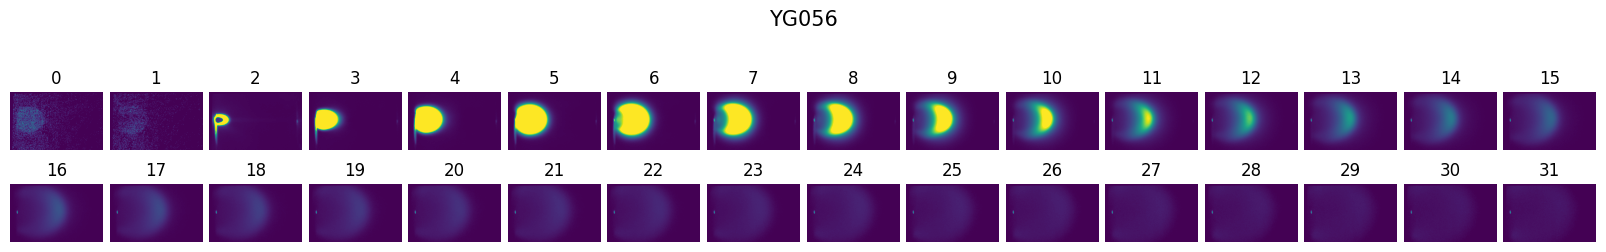

100%|██████████| 219/219 [00:29<00:00,  7.36it/s]


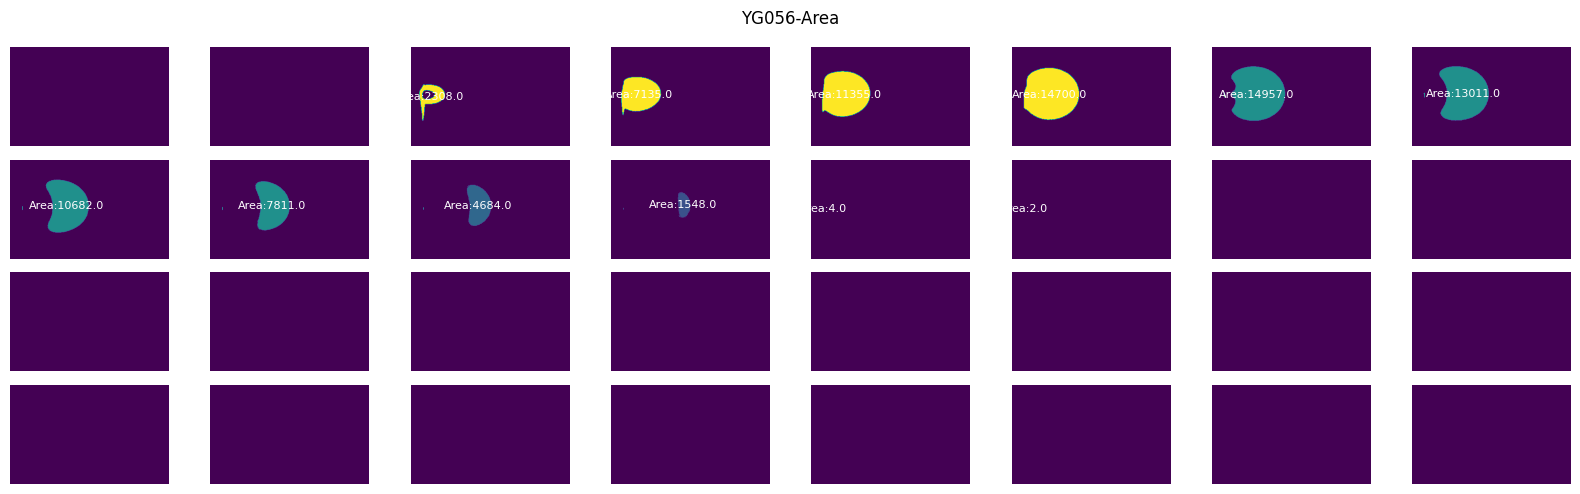

100%|██████████| 219/219 [00:31<00:00,  6.87it/s]


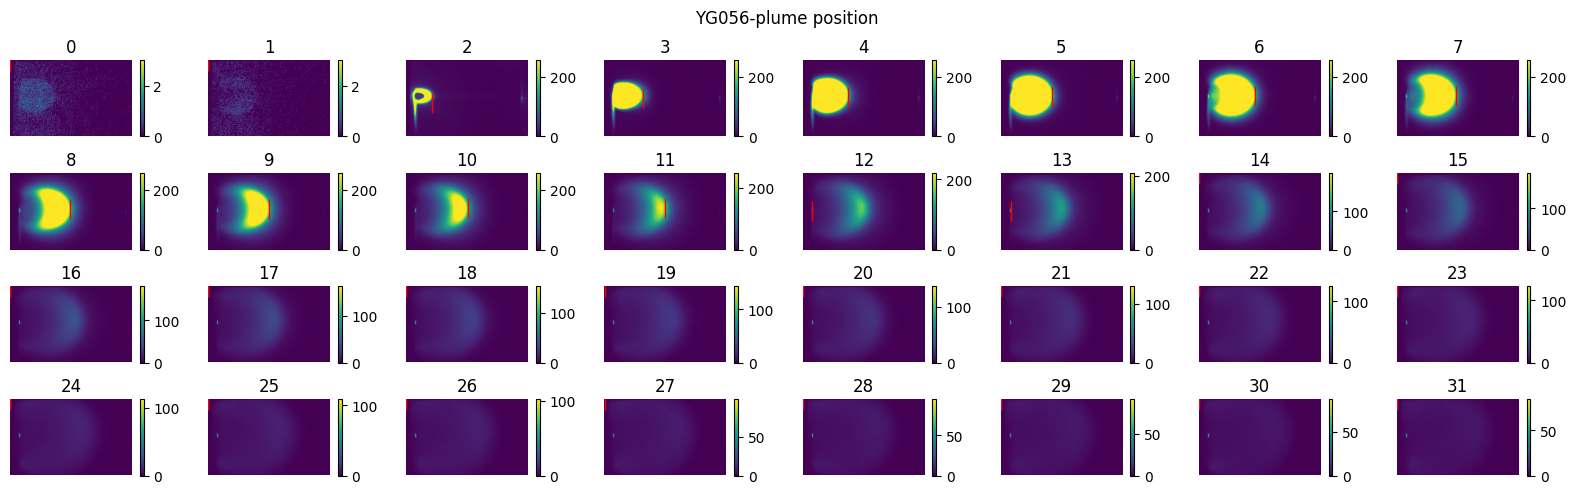

In [10]:
# visualize parameters
viz_parms = {'viz':True, 'index':5, 'viz_index':list(np.arange(0, 32, 1)), 'plume_name': ds_name}

# align parameters
coords_standard = np.load('./standard_coords.npy')
align_parms = {'align':False, 'coords':coords_YG056, 'coords_standard':coords_standard}

# metric parameters
start_position = np.round(np.mean(coords_YG056[:2], axis=0)).astype(np.int32) # start position of plume  (x, y)
position_range = np.min(coords_YG056[:,0]), np.max(coords_YG056[:,0]) # x position range

metric_parms = {'time_interval':500e-9, 'start_position':start_position, 'position_range':position_range, 'threshold':'flexible', 'rename_dataset':True}
df_flex = analyze_function(plumes, viz_parms, metric_parms, align_parms={'align':False, 'coords':coords_YG056, 'coords_standard':coords_standard})

metric_parms = {'time_interval':500e-9, 'start_position':start_position, 'position_range':position_range, 'threshold':5, 'rename_dataset':True}
df_5 = analyze_function(plumes, viz_parms, metric_parms, align_parms={'align':True, 'coords':coords_YG056, 'coords_standard':coords_standard})

metric_parms = {'time_interval':500e-9, 'start_position':start_position, 'position_range':position_range, 'threshold':200, 'rename_dataset':True}
df_200 = analyze_function(plumes, viz_parms, metric_parms, align_parms={'align':True, 'coords':coords_YG056, 'coords_standard':coords_standard})

df_all = pd.concat([df_5, df_200, df_flex])
df_all.to_csv('../../../../datasets/SRO_plume_metrics/YG056_metrics.csv')

### plot

In [11]:
df_all = pd.read_csv('../../../../datasets/SRO_plume_metrics/YG056_metrics.csv')
print(df_all['Threshold'].unique())
df_all

['5' '200' 'flexible']


,plume_index,time_index,Distance,Velocity,Area,Threshold,Growth
0,0,0,0,0.0,0.0,5,YG056
1,0,1,0,0.0,0.0,5,YG056
2,0,2,244,488000000.0,38912.0,5,YG056
3,0,3,244,0.0,14793.0,5,YG056
4,0,4,244,0.0,25463.0,5,YG056
...,...,...,...,...,...,...,...
84091,218,123,306,0.0,0.0,flexible,YG056
84092,218,124,306,0.0,0.0,flexible,YG056
84093,218,125,306,0.0,0.0,flexible,YG056
84094,218,126,306,0.0,0.0,flexible,YG056


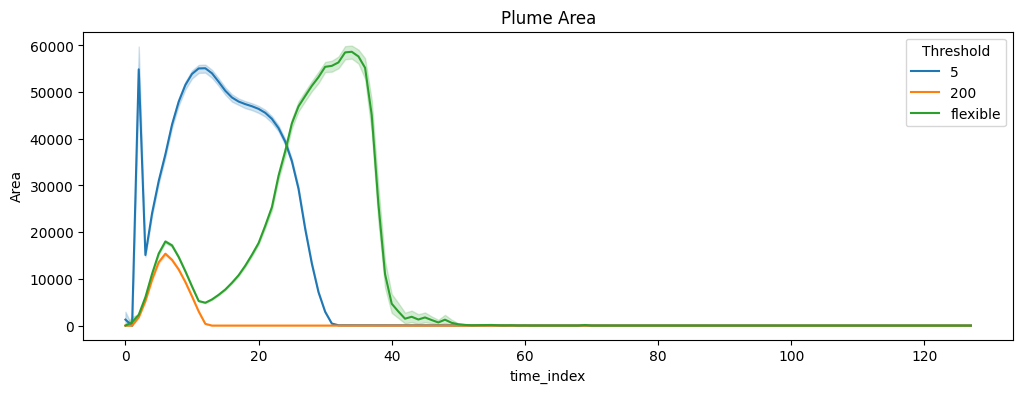

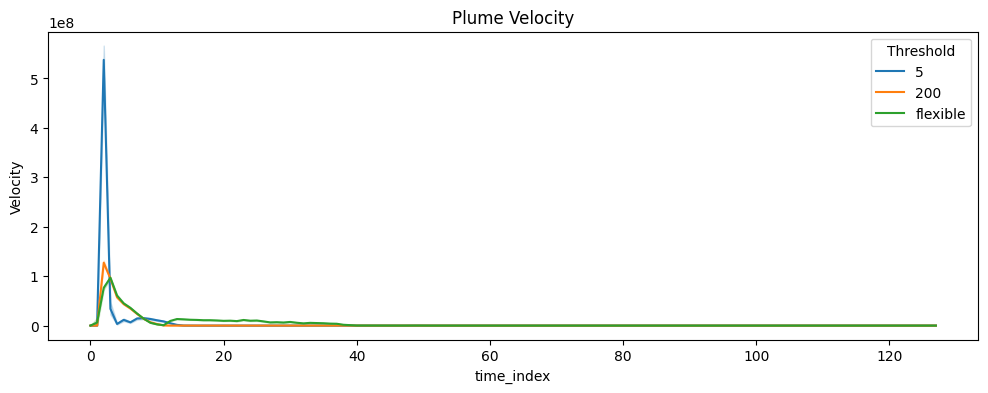

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Area", hue="Threshold", data=df_all)
plt.title('Plume Area')
# plt.xlim(0, 32)
plt.show()

fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="time_index", y="Velocity", hue="Threshold", data=df_all)
plt.title('Plume Velocity')
plt.show()

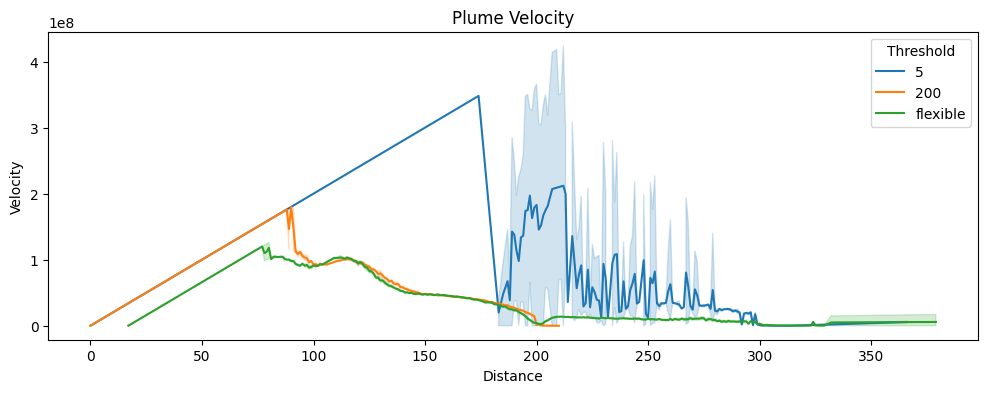

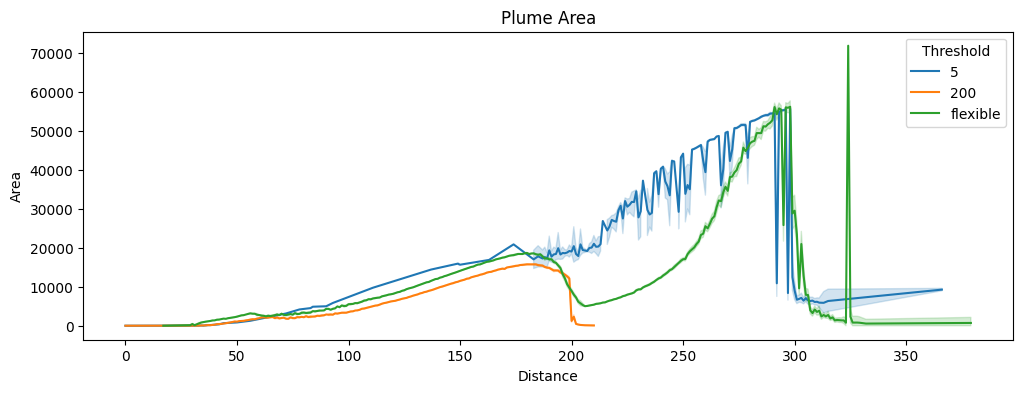

In [13]:
fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Velocity", hue="Threshold", data=df_all)
plt.title('Plume Velocity')
plt.show()

fig, ax = plt.subplots(figsize=(12, 4))
lineplot = sns.lineplot(x="Distance", y="Area", hue="Threshold", data=df_all)
plt.title('Plume Area')
plt.show()